Drug Dictionary

In [14]:
drugs_db = {
    "Paracetamol": {
        "safe_dose_per_kg": 15,  # mg/kg
        "max_daily_dose": 4000    # mg
    },
    "Ibuprofen": {
        "safe_dose_per_kg": 10,  # mg/kg
        "max_daily_dose": 1200    # mg
    }
}

In [15]:
# تجربة
print("Safe dose for Paracetamol is:", drugs_db["Paracetamol"]["safe_dose_per_kg"], "mg/kg")

Safe dose for Paracetamol is: 15 mg/kg


In [19]:

drugs_db["Amoxicillin"] = {"safe_dose_per_kg": 20, "max_daily_dose": 1500}

print(drugs_db.keys())

dict_keys(['Paracetamol', 'Ibuprofen', 'Amoxicillin'])


The Calculation Logic

In [25]:
selected_drug = input("Enter drug name (Paracetamol, Ibuprofen, Amoxicillin):")

patient_weight = float(input("Enter patient weight in kg:"))

dose_per_kg = drugs_db[selected_drug]["safe_dose_per_kg"]

final_dose = dose_per_kg * patient_weight

print("-" * 30)
print(f"Patient Weight: {patient_weight} kg")
print(f"Selected Drug: {selected_drug}")
print(f"Recommended Single Dose: {final_dose}")
print("-" * 30)

Enter drug name (Paracetamol, Ibuprofen, Amoxicillin):Ibuprofen
Enter patient weight in kg:8
------------------------------
Patient Weight: 8.0 kg
Selected Drug: Ibuprofen
Recommended Single Dose: 80.0
------------------------------


In [23]:
selected_drug = input("Enter drug name: ")

if selected_drug in drugs_db:
    patient_weight = float(input("Enter weight in kg: "))
    dose = drugs_db[selected_drug]["safe_dose_per_kg"] * patient_weight
    print(f"The dose is: {dose} mg")
else:
    print("Sorry, this drug is not in our database.")

Enter drug name: Diclofenac
Sorry, this drug is not in our database.


Max Dose Warning System

In [34]:
selected_drug = input("Enter drug name:")

if selected_drug in drugs_db:
    patient_weight = float(input("Enter weight in kg:"))
    dose =drugs_db[selected_drug]["safe_dose_per_kg"] * patient_weight
    max_limit = drugs_db[selected_drug]["max_daily_dose"]
    print(f"\n Calculated Dose: {dose} mg")

    if dose > max_limit:
        print(f"WARNING: this dose exceeds the maximum daily limit of {max_limit} mg!")

    else:
        print("This dose is within the safe range.")

else:
    print("Drug not found.")

Enter drug name:Amoxicillin
Enter weight in kg:80

 Calculated Dose: 1600.0 mg


Pandas (Data Manipulation)

In [35]:
import pandas as pd

df_drugs = pd.DataFrame.from_dict(drugs_db, orient="index")
df_drugs.index.name = "Drug_name"
df_drugs.reset_index(inplace=True)

print(df_drugs)

     Drug_name  safe_dose_per_kg  max_daily_dose
0  Paracetamol                15            4000
1    Ibuprofen                10            1200
2  Amoxicillin                20            1500


In [36]:
low_dose_drugs = df_drugs[df_drugs["max_daily_dose"]<2000]

print("Drugs with max daily dose less than 2000mg:")
print(low_dose_drugs)

Drugs with max daily dose less than 2000mg:
     Drug_name  safe_dose_per_kg  max_daily_dose
1    Ibuprofen                10            1200
2  Amoxicillin                20            1500


In [37]:
df_drugs.to_excel("Clinical_Drug_Database.xlsx", index=False)

print("File has been saved successfully!")

File has been saved successfully!


Data Visualization

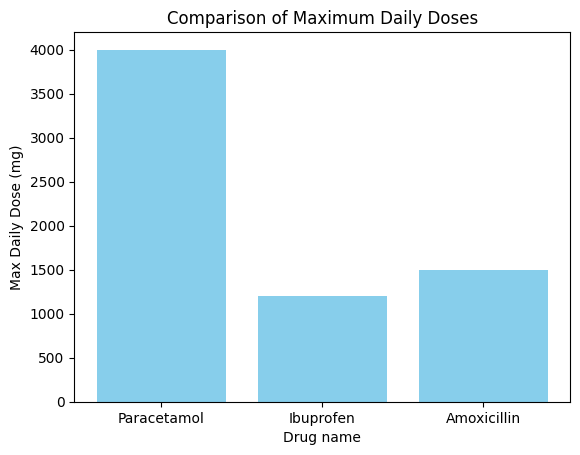

In [39]:
import matplotlib.pyplot as plt

plt.bar(df_drugs["Drug_name"], df_drugs["max_daily_dose"], color="skyblue")

plt.xlabel("Drug name")
plt.ylabel("Max Daily Dose (mg)")
plt.title("Comparison of Maximum Daily Doses")

plt.show()

Error Handling and Input Validation

In [40]:

try:
    patient_weight = input("Enter patient weight (kg): ")
    weight = float(patient_weight)

    if weight <= 0:
        print("Error: Weight must be a positive number!")
    else:
        print(f"Weight accepted: {weight} kg")

except ValueError:
    print("Invalid Input: Please enter a numeric value.")

Enter patient weight (kg): -5
Error: Weight must be a positive number!


Drug-Drug Interaction

In [41]:

interactions = [
    {"Ibuprofen", "Aspirin"},
    {"Amoxicillin", "Methotrexate"}]


drug1 = input("Enter first drug: ")
drug2 = input("Enter second drug: ")


current_combination = {drug1, drug2}
has_interaction = False

for interact in interactions:
    if interact == current_combination:
        has_interaction = True
        break


if has_interaction:
    print(f"ALERT: There is a known interaction between {drug1} and {drug2}!")
else:
    print(f"No major interaction found between {drug1} and {drug2}.")

Enter first drug: Ibuprofen
Enter second drug: Aspirin
ALERT: There is a known interaction between Ibuprofen and Aspirin!


Final Code Assembly

--- Welcome to Clinical Dose Analyzer ---
Enter drug name: Ibuprofen
Enter patient weight (kg): 15

Result for Ibuprofen:
Calculated Dose: 150.0 mg
Dose is safe.


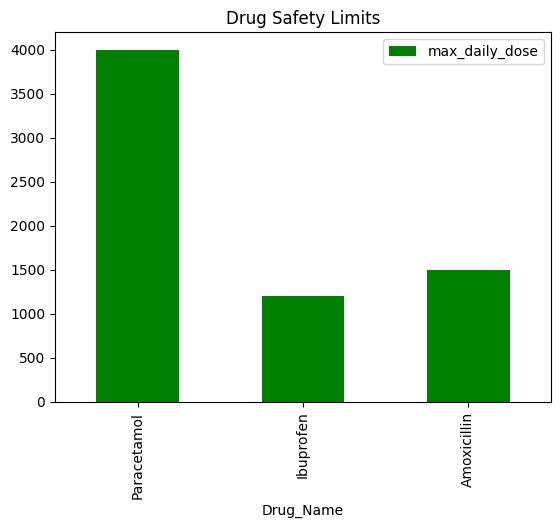

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

#1
drugs_data = {
    "Paracetamol": {"safe_dose_per_kg": 15, "max_daily_dose": 4000},
    "Ibuprofen": {"safe_dose_per_kg": 10, "max_daily_dose": 1200},
    "Amoxicillin": {"safe_dose_per_kg": 20, "max_daily_dose": 1500}}

df_drugs = pd.DataFrame.from_dict(drugs_data, orient='index')
df_drugs.index.name = 'Drug_Name'
df_drugs.reset_index(inplace=True)

#2
interactions = [{"Ibuprofen", "Aspirin"}]

print("--- Welcome to Clinical Dose Analyzer ---")

try:
    selected_drug = input("Enter drug name: ").capitalize()

    if selected_drug in df_drugs['Drug_Name'].values:
        weight = float(input("Enter patient weight (kg): "))


        dose_rate = df_drugs.loc[df_drugs['Drug_Name'] == selected_drug, 'safe_dose_per_kg'].values[0]
        max_limit = df_drugs.loc[df_drugs['Drug_Name'] == selected_drug, 'max_daily_dose'].values[0]

        final_dose = dose_rate * weight

        print(f"\nResult for {selected_drug}:")
        print(f"Calculated Dose: {final_dose} mg")

        if final_dose > max_limit:
            print(f"WARNING: Exceeds max limit ({max_limit} mg)!")
        else:
            print("Dose is safe.")

#3
        df_drugs.plot(kind='bar', x='Drug_Name', y='max_daily_dose', color='green')
        plt.title("Drug Safety Limits")
        plt.show()

    else:
        print("Drug not found in database.")

except ValueError:
    print("Error: Please enter a valid number for weight.")

Automated Data Loading

In [44]:
import pandas as pd

excel_file = "Clinical_Drug_Database.xlsx"

try:
    df_drugs = pd.read_excel(excel_file)

    df_drugs.set_index('Drug_name', inplace=True)

    print("System Status: Database loaded successfully from Excel.")
    print("-" * 30)
    print("Available Medications in Database:")
    print(df_drugs.index.tolist())
    print("-" * 30)

except FileNotFoundError:
    print("Error: File 'Clinical_Drug_Database.xlsx' not found. Please upload it to the file browser.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

System Status: Database loaded successfully from Excel.
------------------------------
Available Medications in Database:
['Paracetamol', 'Ibuprofen', 'Amoxicillin']
------------------------------


In [45]:
selected_drug = "Paracetamol"

if selected_drug in df_drugs.index:
    dose_per_kg = df_drugs.loc[selected_drug, 'safe_dose_per_kg']
    max_daily = df_drugs.loc[selected_drug, 'max_daily_dose']

    print(f"Drug: {selected_drug}")
    print(f"Safe Dose: {dose_per_kg} mg/kg")
    print(f"Max Daily Limit: {max_daily} mg")

Drug: Paracetamol
Safe Dose: 15 mg/kg
Max Daily Limit: 4000 mg
